# 预测美国人口增长：Logistic 回归的应用

接下来的 Jupyter Notebook 中，我们会使用 Python 给大家演示如何对于美国人口增长建模，并对未来作出预测。

下面的步骤就是对于 Tensorflow 工作流程的简单模拟。理解了这个文件中的代码，就可以学习 Tensorflow 并且使用其深度学习功能。

在看到不理解的步骤时，不要慌，先上百度搜索相关代码，尝试一行一行地自己理解其中的逻辑，只有不理解的人才能理解，不理解是一个正常的过程。

以下代码假设你会：简单的 Python 编程、高中程度的数学知识、前几天在 ML 课上有听课。如果没有满足以上所有要求，请马上找同学或 MA 补全漏洞

In [3]:
!pwd # 请运行本行，并确认自己在想要的文件夹内

/Users/zhenchen/Desktop/TechX2017/ML-ipynb


In [4]:
!ls # 请运行本行，并确认文件夹里有 “census.csv” 文件

census.csv
crawl.ipynb
face_detection.ipynb
hog_ped.ipynb
kmeans.ipynb
logistic-regression-sample-中文注解-v1.2_.ipynb
logistic-regression-sample.ipynb
mnist.py
mnist_cnn.ipynb
scikit-learn_tutorial.ipynb
scikit-learn_tutorialRAW.ipynb
spam_detection.ipynb
spam_detection.py
test.ipynb
theano.ipynb
train_digit.ipynb


In [5]:
# 加载运行所需模块
import pandas as pd # 读取和操作数据使用
import numpy as np # 进行数学运算使用
import matplotlib.pyplot as plt # 绘图使用

In [8]:
# 载入美国历史人口数据，并选择 'Year' 为索引
data = pd.read_csv('./census.csv', index_col='Year')
data.head()

,Population
Year,
1790,3.929
1800,5.308
1810,7.240
1820,9.638
1830,12.866


In [9]:
# 分开训练和测试两组数据。在这里，我们使用前 80% 的数据做训练，
# 后 20% 做测试
train_size = int(0.8 * len(data))
train = data.iloc[:train_size]
test = data.iloc[train_size:]

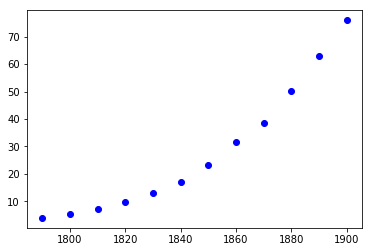

In [10]:
# 将训练数据点画出以猜测模型
plt.scatter(train.index.values, train.Population.values, color='b', label='Train')
plt.show()

** 可以猜测有以下模型可选：线性、二次函数或 Sigmoid 函数 **

$lin(x) = kx + b$

$quad(x) = a(x - b)^2 + c$

$sigmoid(x) = \frac{L}{1 + e^{-k(x-x_0)}}$

In [11]:
# 我们假设可能是以下几种模型：线性、二次函数或 Sigmoid 函数
def linear(x, k, b):
    """
    一次函数（直线）
    x: 自变量
    k: 直线斜率
    b: 直线截距
    """
    return k * x + b

def quadratic(x, a, b, c):
    """
    二次函数（抛物线）
    x: 自变量
    a: 抛物线开口的宽度
    b: 抛物线顶点的横向位置
    c: 抛物线顶点的纵向位置
    """
    return a * (x - b)**2 + c

def sigmoid(x, L, k, x0):
    """
    x: 自变量
    L: 曲线高度
    k: 曲线斜度
    x0: 曲线平移度
    """
    return L / (1 + np.exp(-k * (x - x0)))

In [12]:
# 在这里，我们指定训练的模型
function_used = sigmoid

# 把训练集和测试集里的 x 和 y 分离出来
x_train = train.index.values
y_train = train.Population.values
x_test = test.index.values
y_test = test.Population.values

# Squared Loss 是我们每一个预测的 y
# 与实际 y 差值的平方和，如果我们
# 让这个函数的值变得最小，我们
# 就可以让我们的模型最接近数据
def squared_loss(params, fun):
    global x_train, y_train
    loss = fun(x_train, *params) - y_train
    return np.sum(loss ** 2)

In [13]:
from scipy.optimize import minimize
# 我们使用 scipy 库里面的 minimize 函数，
# 这个函数可以告诉我们另外一个函数在取何值
# 的时候最小。如果我们把 squared loss 函数
# 代进去，就可以完成我们的机器学习。
# minimize 函数需要提供一个猜测的初值。
# 通常我们可以通过函数性质猜一个大概，但是
# 这里我帮你们猜好了
p0 = [500, 0.05, 1940] # Initial params for sigmoid
#p0 = [0.005, 1770, 1] # Initial params for quadratic
#p0 = [1, -2000] # Initial params for linear
res = minimize(squared_loss, p0, args=(function_used))
print("学习完成，参数为： {}".format(res.x))

学习完成，参数为： [  1.79930431e+02   3.20250056e-02   1.90966271e+03]


学习完成，参数为： [  1.79930431e+02   3.20250056e-02   1.90966271e+03]
预测的平方均差 6.23


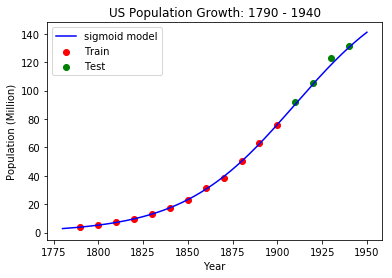

In [14]:
print("学习完成，参数为： {}".format(res.x))

# Calculate test error
from sklearn.metrics import mean_squared_error
print("预测的平方均差 "
      "{0:.2f}".format(mean_squared_error(y_test, function_used(x_test, *res.x))))

# Plot the fitted line
x_plot = np.linspace(1780, 1950, 200)
y_plot = function_used(x_plot, *res.x)
plt.plot(x_plot, y_plot, color='b',
         label='{} model'.format(function_used.__name__))

# Draw the original data points
plt.scatter(x_train, y_train, color='r', label='Train')
plt.scatter(x_test, y_test, color='g', label='Test')
plt.legend()

plt.xlabel('Year')
plt.ylabel('Population (Million)')
plt.title('US Population Growth: 1790 - 1940')
plt.show()